<div style="text-align: center; font-family: Arial, sans-serif; padding: 20px;">
    <h2 style="font-size: 1.5em; font-weight: bold;">UNIVERSIDAD NACIONAL DE SAN AGUSTÍN DE AREQUIPA</h2>
    <h3 style="font-size: 1.2em; font-weight: bold;">FACULTAD DE PRODUCCIÓN Y SERVICIOS</h3>
    <h3 style="font-size: 1.2em; font-weight: bold;">ESCUELA PROFESIONAL DE INGENIERÍA EN TELECOMUNICACIONES</h3>
    <div style="margin: 20px 0;">
        <img src="./images/Escudo_UNSA.png" alt="Escudo de la universidad" style="width: 150px; height: auto;">
    </div>
    <h2 style="font-size: 1.5em; font-weight: bold;">REDES INALÁMBRICAS</h2>
    <h3 style="font-size: 1.2em; font-weight: bold; font-style: italic;">
        ANGLE OF ARRIVAL - PRACTICA 4
    </h3>
    <p style="text-align: center; font-size: 1em; margin-top: 30px;">
        <strong>Docente:</strong><br>
        Dr. Alexander Hilario Tacuri
    </p>
    <p style="text-align: center; font-size: 1em;">
        <strong>Integrantes:</strong><br>
        Chavez Ponce Jorge Alberto<br>
        Cana Remache Javier Ricardo<br>
        Neyra Torres Luis Kenny<br>
        Yllachura Arapa Rosangela
    </p>
    <p style="margin-top: 50px; font-size: 1.2em; font-weight: bold; text-align: center;">
        AREQUIPA – PERÚ
    </p>
    <p style="font-size: 1em; font-weight: bold; text-align: center;">
        2024
    </p>
</div>


# 2.1 Parte 1: Estimación de ángulo de llagada de una señal

In [1]:
%matplotlib inline
from matplotlib import pyplot
import scipy.io
import numpy as np

## Multiple Signal Classification Algorithm

In [2]:
def MUSIC_algo(recv_signal, D, M):
    """
    Implementación del algoritmo MUSIC para la estimación del ángulo de llegada (AoA).

    Parámetros:
      a) recv_signal : Matriz de señales recibidas [M x N]
      b) D           : Número de múltiples trayectorias (fuentes)
      c) M           : Tamaño del arreglo de antenas (número de antenas)

    Salida:
      P : Vector con la estimación del pseudoespectro MUSIC en el rango [-90°, 90°].
    """

    # Constantes del sistema
    C = 3e8  # Velocidad de la luz (m/s)
    CHANNEL_FREQ = 2.5e9  # Frecuencia de la señal (Hz)
    LAMBDA = C / CHANNEL_FREQ  # Longitud de onda (m)
    ANT_SPACING = LAMBDA / 2  # Espaciado entre antenas (m)

    # Paso 1: Cálculo de la matriz de correlación (R)
    # R = (1/N) * recv_signal * recv_signal_H (donde H es el conjugado transpuesto)
    R = np.dot(recv_signal, recv_signal.conj().T) / recv_signal.shape[1]  # [M x M]

    # Paso 2: Descomposición en valores propios de R
    eigenvalues, eigenvectors = np.linalg.eigh(R)

    # Paso 3: Selección del subespacio de ruido
    # Ordenar los valores propios de menor a mayor
    idx = np.argsort(eigenvalues)
    # Los D valores propios más grandes corresponden a las señales,
    # el resto corresponden al ruido.
    noise_eigenvectors = eigenvectors[:, idx[:-D]]

    # Función auxiliar: Vector de direccionamiento
    def steering_vector(theta):
        # Convierte el ángulo a radianes
        theta_rad = np.deg2rad(theta)
        # Crea el vector de direccionamiento del arreglo
        return np.exp(
            -1j * 2 * np.pi * ANT_SPACING * np.arange(M) * np.sin(theta_rad) / LAMBDA
        )

    # Paso 4: Cálculo del pseudoespectro P de MUSIC
    angles = np.linspace(-90, 90, 181)  # discretización del ángulo
    P = np.zeros_like(angles, dtype=float)

    for i, theta in enumerate(angles):
        a_theta = steering_vector(theta).reshape(-1, 1)
        # Pseudoespectro: P(theta) = 1 / (a_H * E_n * E_n_H * a)
        # donde E_n es la matriz de vectores propios del ruido
        denom = (
            a_theta.conj().T
            @ noise_eigenvectors
            @ noise_eigenvectors.conj().T
            @ a_theta
        )
        P[i] = 1 / denom.real

    return P

## Ejemplos de uso del Algoritmo MUSIC 

### Prueba 1: Ángulo de llegada

Los ángulos de llegada se definen como:

$$
\theta = [0.1, 0.3, 0.7] * \pi
$$

/var/folders/26/2j5v5y394q7fg0m_5hxsv0w80000gp/T/ipykernel_87426/2334808376.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i] = 1 / denom.real


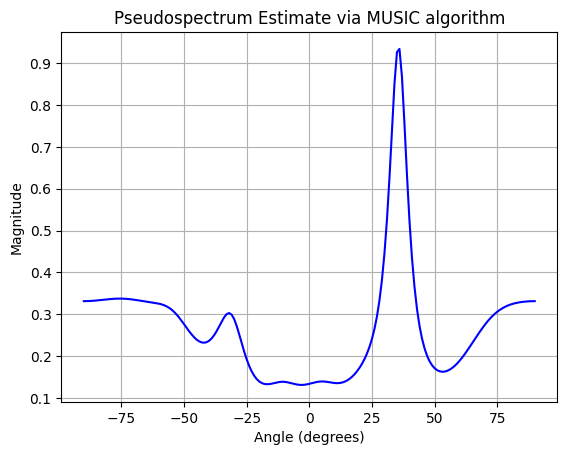

In [3]:
mat = scipy.io.loadmat('AoA_data1.mat')  # Carga los datos desde un archivo .mat
recv_signal = mat['csi_sample']  # Extrae la señal recibida del archivo (matriz de muestras)
D = 3  # Número de múltiples trayectorias (fuentes de señal)
M = 8  # Número de antenas en el arreglo

# Calcula el pseudoespectro utilizando el algoritmo MUSIC
p_spectrum = MUSIC_algo(recv_signal, D, M)

# Graficar el pseudoespectro
pyplot.figure()
pyplot.title("Pseudospectrum Estimate via MUSIC algorithm")  # Título del gráfico
pyplot.xlabel("Angle (degrees)")  # Etiqueta del eje X
pyplot.ylabel("Magnitude")  # Etiqueta del eje Y
pyplot.grid()  # Añadir cuadrícula al gráfico
pyplot.plot(np.linspace(-90, 90, 181), np.abs(p_spectrum), 'blue')  # Grafica el pseudoespectro en el rango [-90°, 90°]
pyplot.show()  # Muestra el gráfico


### Prueba 2: Ángulo de llegada

Los ángulos de llegada se definen como:

$$
\theta = 0.3 * \pi, 0.7 * \pi
$$

/var/folders/26/2j5v5y394q7fg0m_5hxsv0w80000gp/T/ipykernel_87426/2334808376.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i] = 1 / denom.real


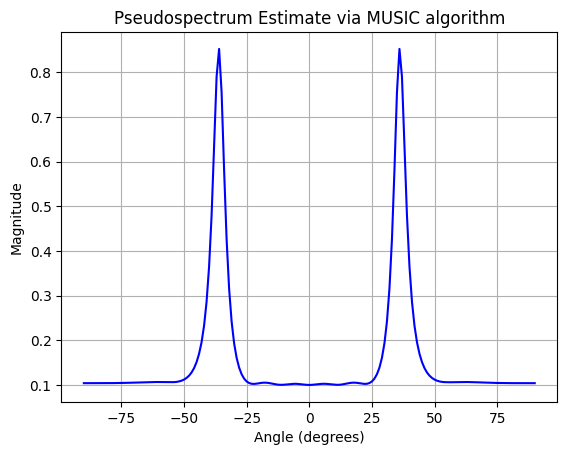

In [4]:
mat = scipy.io.loadmat('AoA_data2.mat')  # Carga otro conjunto de datos desde un archivo .mat
recv_signal = mat['csi_sample']  # Extrae la señal recibida
D = 2  # Número de múltiples trayectorias (fuentes de señal)
M = 10  # Número de antenas en el arreglo

# Calcula el pseudoespectro utilizando el algoritmo MUSIC
p_spectrum = MUSIC_algo(recv_signal, D, M)

# Graficar el pseudoespectro
pyplot.figure()
pyplot.title("Pseudospectrum Estimate via MUSIC algorithm")  # Título del gráfico
pyplot.xlabel("Angle (degrees)")  # Etiqueta del eje X
pyplot.ylabel("Magnitude")  # Etiqueta del eje Y
pyplot.grid()  # Añadir cuadrícula
pyplot.plot(np.linspace(-90, 90, 181), np.abs(p_spectrum), 'blue')  # Grafica el pseudoespectro
pyplot.show()  # Muestra el gráfico


### Prueba 3: Generando señales aleatorias

In [5]:
def generate_random_signal(M, N, seed=None):
    """
    Genera una matriz de señales aleatorias de valores complejos.
    :param M: Número de antenas (filas) en el arreglo.
    :param N: Número de muestras de tiempo (columnas).
    :param seed: Semilla para asegurar la reproducibilidad de los valores aleatorios.
    :return: Matriz compleja de tamaño MxN.
    """
    if seed is not None:
        np.random.seed(seed)  # Fijar la semilla para garantizar resultados reproducibles
    real_part = np.random.randn(M, N)  # Generar la parte real de la señal con distribución normal estándar
    imag_part = np.random.randn(M, N)  # Generar la parte imaginaria de la señal con distribución normal estándar
    return real_part + 1j * imag_part  # Combinar las partes real e imaginaria para obtener valores complejos

# Parámetros del sistema
M_random = 8  # Número de antenas en el arreglo
N_random = 100  # Número de muestras en el tiempo

# Generar la señal aleatoria compleja
random_signal = generate_random_signal(M_random, N_random, seed=42)


/var/folders/26/2j5v5y394q7fg0m_5hxsv0w80000gp/T/ipykernel_87426/2334808376.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P[i] = 1 / denom.real


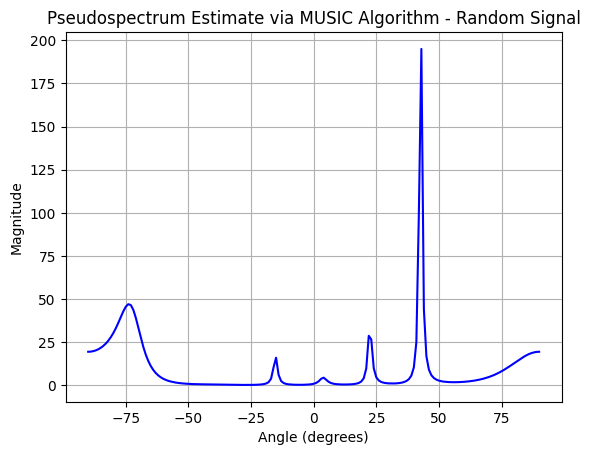

In [6]:
# Aplicar el algoritmo MUSIC a la señal aleatoria generada
D_random = 7  # Número de trayectorias o fuentes de señal asumidas para la demostración
p_spectrum_random = MUSIC_algo(random_signal, D_random, M_random)

# Graficar el pseudoespectro para la señal aleatoria
pyplot.figure()  # Crear una nueva figura
pyplot.title("Pseudospectrum Estimate via MUSIC Algorithm - Random Signal")  # Título del gráfico
pyplot.plot(np.linspace(-90, 90, 181), np.abs(p_spectrum_random), 'blue')  # Graficar el pseudoespectro en el rango [-90°, 90°]
pyplot.xlabel("Angle (degrees)")  # Etiqueta del eje X
pyplot.ylabel("Magnitude")  # Etiqueta del eje Y
pyplot.grid()  # Añadir cuadrícula al gráfico
pyplot.show()  # Mostrar el gráfico
